In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread(r'C:\Users\prave\Downloads\tt.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread(r'C:\Users\prave\Downloads\tt2.jpg', cv.IMREAD_GRAYSCALE)
sift = cv.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
pts1 = []
pts2 = []

for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [2]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)


In [3]:
print("The fundamental matrix is:\n", F)

The fundamental matrix is:
 [[ 6.17023998e-08  1.73991185e-07 -2.07777209e-04]
 [ 1.93216993e-07 -1.79895439e-08  1.62073572e-04]
 [-3.74992546e-04 -8.75455444e-04  1.00000000e+00]]


In [4]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),10,color,-1)
        img2 = cv.circle(img2,tuple(pt2),10,color,-1)
    return img1,img2

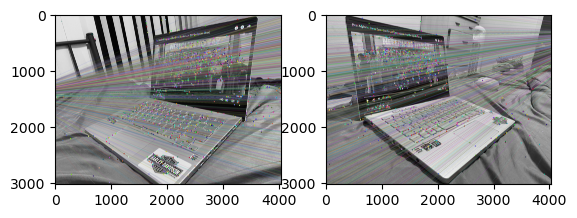

In [5]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

In [6]:
import numpy as np

K = np.array([
    [1.50843078e+03, 0.00000000e+00, 7.60167641e+02],
    [0.00000000e+00, 1.50272747e+03, 1.00963246e+03],
    [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]
])

In [9]:
K

array([[1.50843078e+03, 0.00000000e+00, 7.60167641e+02],
       [0.00000000e+00, 1.50272747e+03, 1.00963246e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [7]:
E = np.dot(np.dot(K.T,F),K)

In [8]:
E

array([[ 0.14039538,  0.39439632,  0.02231589],
       [ 0.43797662, -0.04062381,  0.43697519],
       [-0.20063673, -1.14411028,  0.13588962]])